<a href="https://colab.research.google.com/github/A-wagstaff/CapU-Comp/blob/main/COMP215/Projects/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - Project 1 - Plotting NEOs
----------------
#### Name: Alex Wagstaff
#### Date: February 26 2023

#Project Objectives
------
Use NASAs NEO API to fetch structured data, and by employing matplotlib to graphically summarise the data develop an application to report on Near Earth Objects

In [ ]:
import datetime, json, requests
from pprint import pprint    # data structure analysis 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta

#Parameters
---
Orbiting_body: Filters and graphs relative to chosen body, possible values are 'Earth', 'Moon', 'Mars', 'Juptr', 'Venus', 'Merc'. Earth is recommended as there is significantly less data for other bodies.

Date_range: How many days of data to collect, recommend less than 7 due to API call limits 

End_date: The end of the date range. Edit line 4 and comment out line 5 of the parameters block to set a custom date, otherwise it will default to today.

Hazardous_only: Only displays data relating to objects classified as hazardous if true, possible values are True and False. Setting this parameter to True may not collect any data if there are no hazardous NEOs in the date range.

Objects_displayed: Number of objects that make the closest approach to orbiting body to show on the graph, default 5. 

In [ ]:
# Parameters Block
Orbiting_body = 'Earth'
Date_range = 7
End_date = datetime.date(2023,2,26) #Year, Month(No zeros), day
End_date = datetime.date.today() #Comment out if custom date is used
Hazardous_only = False
Objects_displayed = 5

In [ ]:
# Initial API Call to find NEO ids for objects approaching Earth over date range. 
delta = timedelta(days = 1)
date1 = End_date
date2 = (date1-(delta*Date_range))
API_KEY = 'cx8zWYh0hvtVWndBCqI5Dfscy7S5Bbv2QLAjqLhP'
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={date2}&end_date={date1}&api_key={API_KEY}'
response = requests.request("GET", url, headers={}, data={})

In [ ]:
data = json.loads(response.text)
data = data['near_earth_objects']

In [ ]:
id_master = []
if Date_range <1:
  End_date = str(End_date)
  if Hazardous_only == True: #Hazardous Parameter Check
    id = [item['id'] for item in data[End_date] if item['is_potentially_hazardous_asteroid'] is True]
  else:
    id = [item['id'] for item in data[End_date]]
  for n in range(len(id)):#master id list construction
    if id[n] not in id_master:#duplicate checking
      id_master.append(id[n])
else:
  for i in range(Date_range):
    date = str(date1 - (delta*i))
    if Hazardous_only == True: #Hazardous Parameter Check
      id = [item['id'] for item in data[date] if item['is_potentially_hazardous_asteroid'] is True]
    else:
      id = [item['id'] for item in data[date]]
    for n in range(len(id)):#master id list construction
      if id[n] not in id_master:#duplicate checking
        id_master.append(id[n])

94


In [ ]:
# Pulls complete data for each object approaching Earth over Date_range. Has to be complete data so the graph has more than a potentially single points. Checks against Orbiting_body param to keep only related data.
id_dist = {} #Dictionary for finding the closest object keys
id_dates = {} #Dictionary for graphing 
id_distvals = []
id_datevals = []
for i in range(len(id_master)):
  url = f'https://api.nasa.gov/neo/rest/v1/neo/{id_master[i]}?api_key={API_KEY}'
  response = requests.request('GET',url,headers={},data={})
  id_data = json.loads(response.text)
  id_data = id_data['close_approach_data']
  for x in range(len(id_data)):
    if id_data[x]['orbiting_body'] == Orbiting_body:
      id_approach_body = id_data[x]['orbiting_body']
      id_approach_date = id_data[x]['close_approach_date']
      id_approach_dist = round(float(id_data[x]['miss_distance']['kilometers']))
      id_tup=list((id_approach_dist,id_approach_date,id_approach_body))
      id_distvals.append(id_tup)
    else:
      continue
  id_distvals.sort()
  if bool(id_distvals) == True:
    id_whole = {id_master[i]:id_distvals}
  else:
    continue
  id_distvals=[]
  id_dist = {**id_dist,**id_whole}
  for x in range(len(id_data)):
    if id_data[x]['orbiting_body'] == Orbiting_body:
      id_approach_body = id_data[x]['orbiting_body']
      id_approach_date = id_data[x]['close_approach_date']
      id_approach_dist = round(float(id_data[x]['miss_distance']['kilometers']))
      id_tup=((id_approach_dist,id_approach_date,id_approach_body))
      id_datevals.append(id_tup)
    else:
      continue
  if bool(id_datevals) == True:
    id_whole = {id_master[i]:id_datevals}
  else:
    continue
  id_datevals=[]
  id_dates = {**id_dates,**id_whole}

In [ ]:
# Sorting by closest approach to body
id_sorted = {k: v for k, v in sorted(id_dist.items(), key=lambda item: item[1])}
key_list = list(id_sorted.keys())

['54342284', '3771620', '54248645', '3879228', '54225005', '3838860', '3785932', '54051080', '54341551', '3661506', '3712903', '54341646', '3838039', '3440770', '3799715', '54342168', '3444300', '54016355', '3354955', '3689273', '54013539', '54194350', '54130488', '54342223', '54342177', '3840111', '54341590', '54341597', '3596035', '54054611', '3772396', '54342169', '3430304', '3599866', '3837911', '3785760', '54117566', '3147323', '3878588', '54339965', '2162421', '3713269', '2037638', '3942362', '54304126', '3989171', '3836101', '54341516', '54341469', '3743897', '3838254', '54341526', '54054748', '54104724', '54338978', '2140039', '54341519', '54340388', '54130502', '3781446', '3715910', '54123627', '3843533', '2457662', '2152964', '3445442', '3401428', '54309242', '3557826', '54339173', '3573153', '3653388', '2086450', '2455594', '54340310', '3134262', '3781727', '3561031', '54305672', '3740663', '3840848', '54122531', '54328061', '54340443', '2426082', '2238456', '3321532', '2419

#Interpretating the Graphs
----
Each NEO ID will generate a graph showing its distance from the selected object for the dates where data is available.

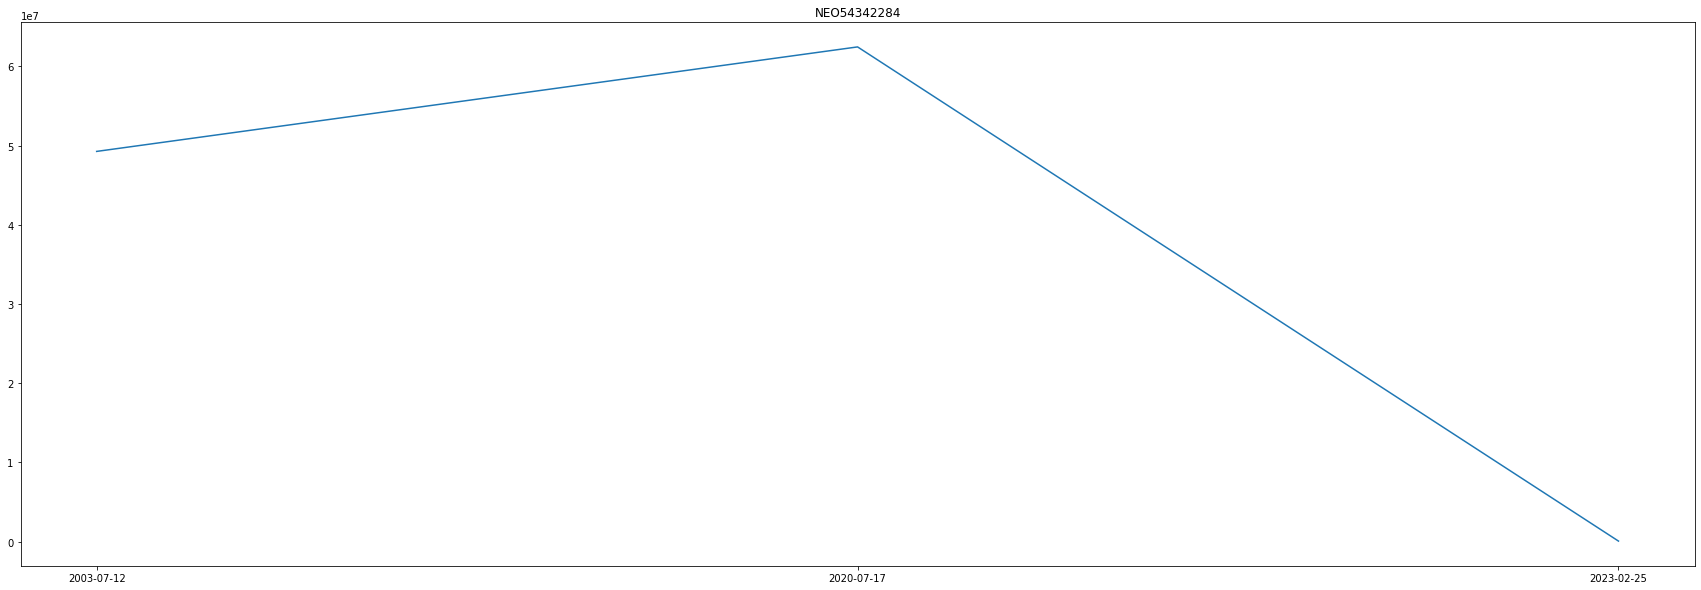

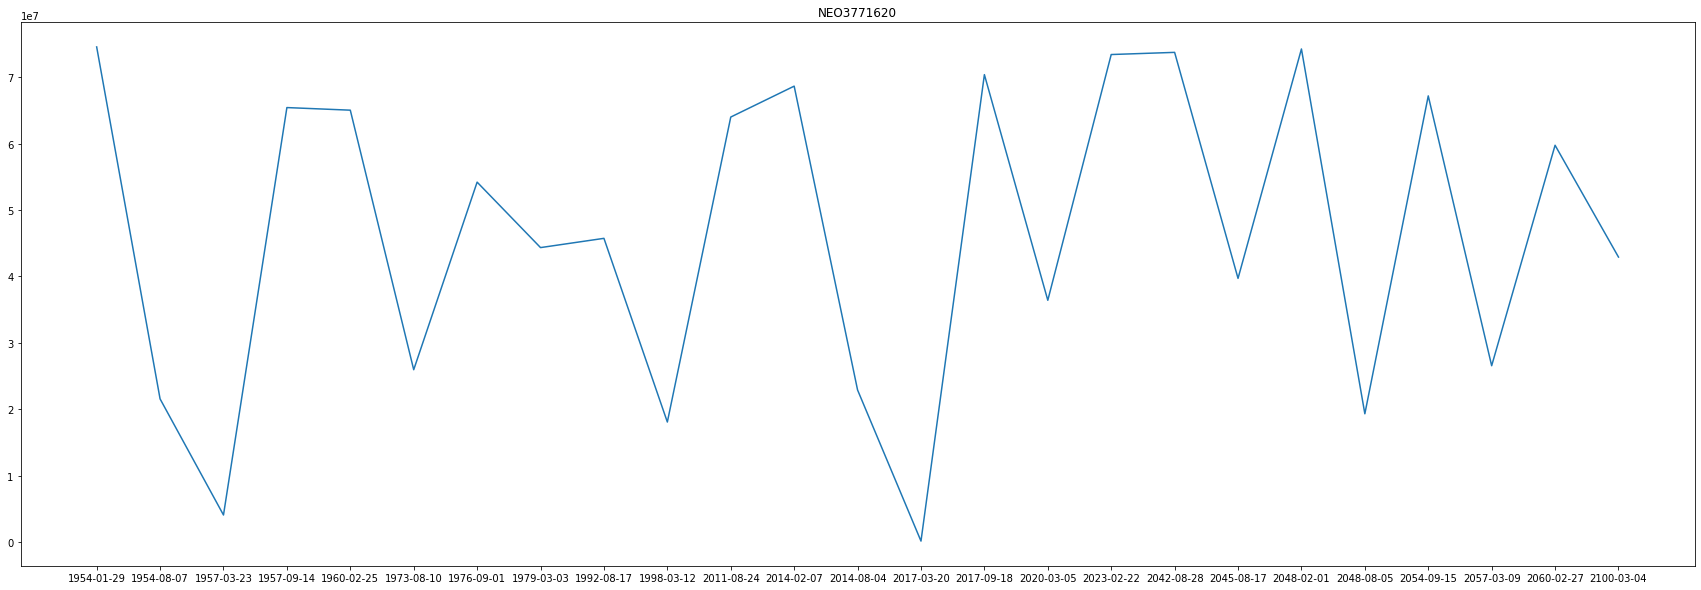

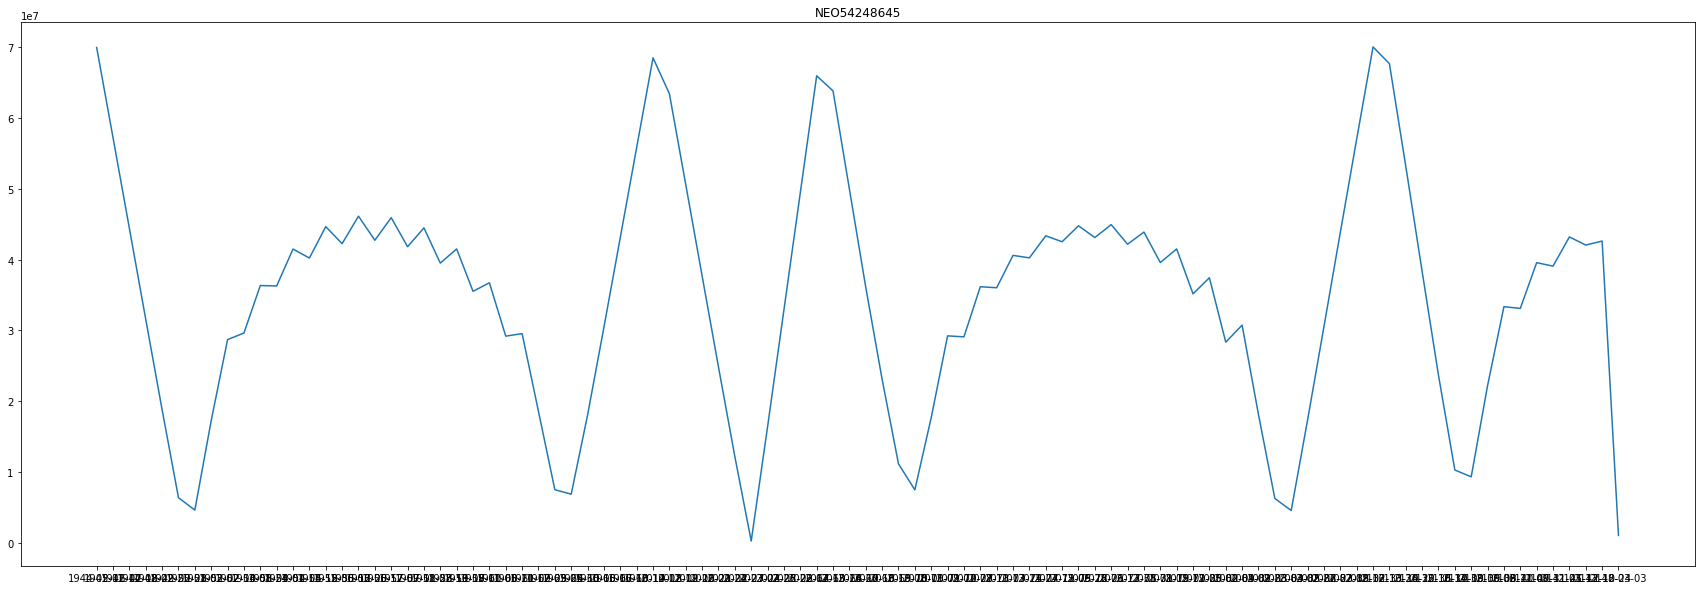

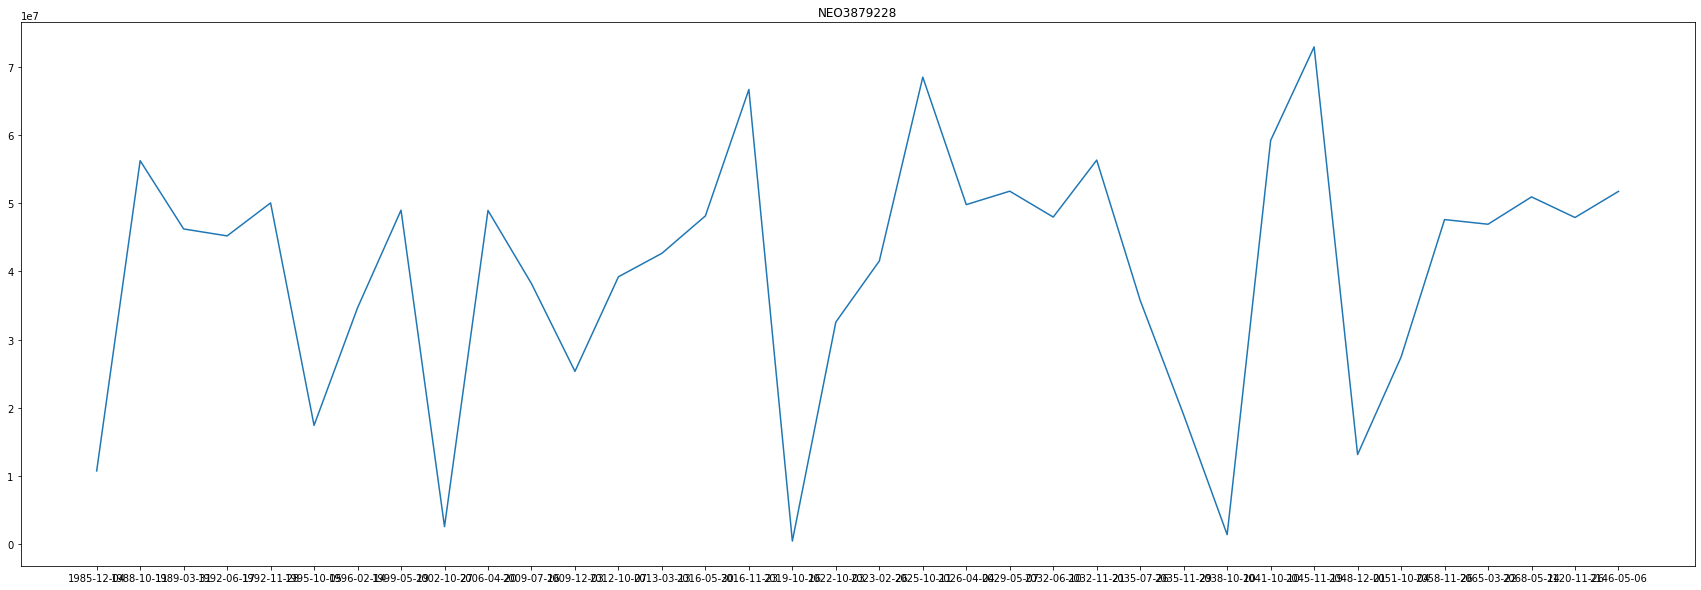

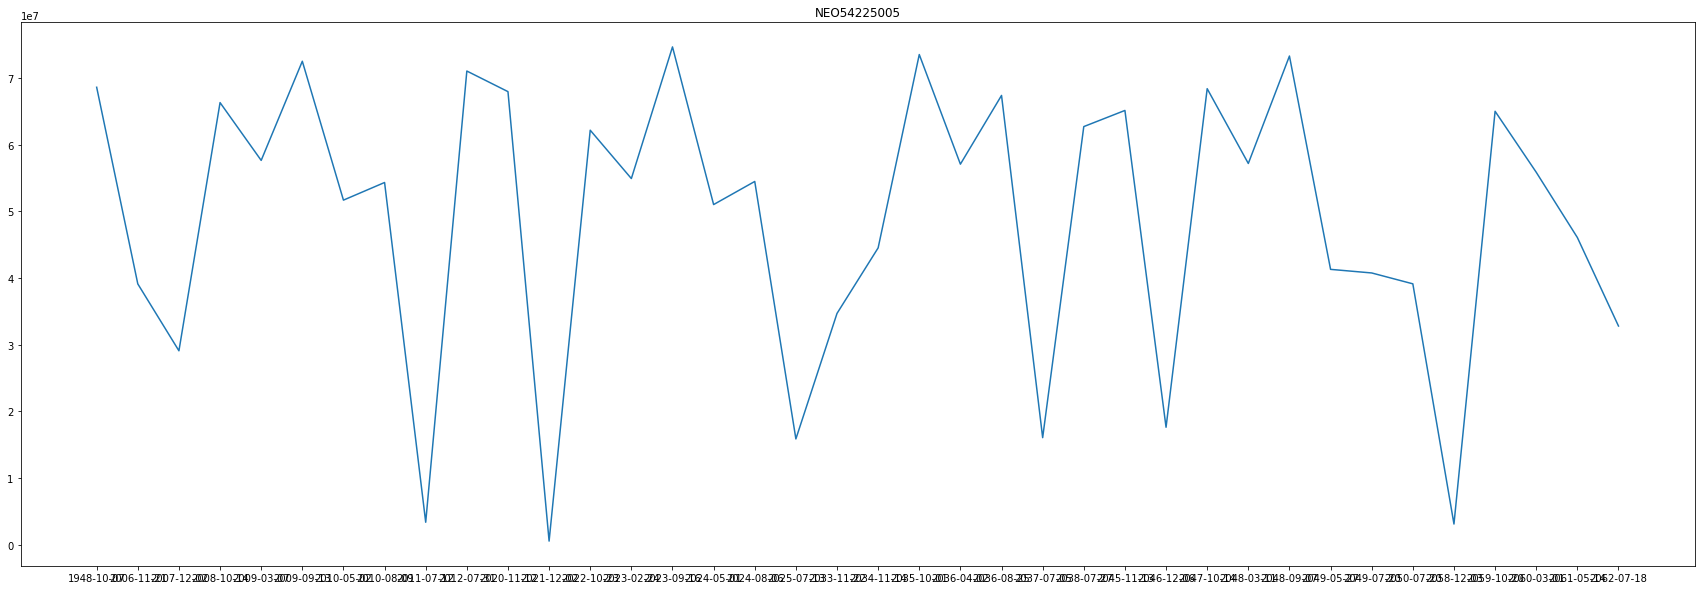

In [ ]:
# Matplotlib work
if Objects_displayed<len(key_list):
  for i in range(Objects_displayed):  
    fig, axs = plt.subplots(figsize=(30,10))
    axs.set_title(f'NEO{key_list[i]}')
    vals = [item for item in id_dates[key_list[i]]]
    x_vals = [vals[n][1] for n in range(len(vals))]
    y_vals = [vals[n][0] for n in range(len(vals))]
    
    plt.plot(x_vals,y_vals)
else:
  for i in range(len(key_list)):
    fig, axs =plt.subplots(figsize=(30,10))
    axs.set_title(f'NEO{key_list[i]}')
    vals = [item for item in id_dates[key_list[i]]]
    x_vals = [vals[n][1] for n in range(len(vals))]
    y_vals = [vals[n][0] for n in range(len(vals))]
    
    plt.plot(x_vals,y_vals)
plt.show()

Reflection:

This works in a rather basic manner. A lot can be refactored, such as the Matplotlib graphing, and some of the loops could be turned into comprehensions.
Sorting of the data could also be improved, as it is rather bloated in the data it carries with it. Employing numpy arrays for the graphing would also make it much easier, but I did not give myself enough time to fully dive into sorting and organizing them. Maybe graphing from a dictionary of numpy arrays would be better. As in using the NEO id as the dict key, and numpy array for the value.
Overlaying all of the datasets onto the same graph creates some strange artifacts, no idea how to fix that.